# AIS Ranking Project

Step 1: importing dataset

In [1]:
import pandas as pd
df=pd.read_excel(r"C:\Users\DELL\Downloads\April_database.xlsx")
df.head()

,ID,University1,University2,University3,University4,University5,University6,University7,University8,University9,...,Author8FName,Author9LName,Author9FName,Author10LName,Author10FName,AuthorCheck,NonArticleCheck,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,1,Georgia State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,2,University of South Florida,University of South Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,3,Virginia Commonwealth University,Georgia State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,4,New York University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,5,City University of Hong Kong,University of British Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [2]:
# Remove rows where NonArticleCheck is 1
df_filtered = df[df['NonArticleCheck'] != 1]

# Remove rows where AuthorCheck is 1
df_filtered = df_filtered[df_filtered['AuthorCheck'] != 1]

# Fill null values with an empty string and convert to string, then merge first and last names
for i in range(1, 11):
    fname_col = f'Author{i}FName'
    lname_col = f'Author{i}LName'
    full_name_col = f'Author{i}FullName'
    
    df_filtered[fname_col] = df_filtered[fname_col].fillna('').astype(str)
    df_filtered[lname_col] = df_filtered[lname_col].fillna('').astype(str)
    
    df_filtered[full_name_col] = df_filtered[fname_col] + ' ' + df_filtered[lname_col]
    
    # Strip any leading/trailing whitespace
    df_filtered[full_name_col] = df_filtered[full_name_col].str.strip()
    
    # Replace '0' with an empty string if both first and last names were originally null
    df_filtered[full_name_col] = df_filtered[full_name_col].replace('^0$', '', regex=True)

# Drop the original first and last name columns
author_fname_columns = [f'Author{i}FName' for i in range(1, 11)]
author_lname_columns = [f'Author{i}LName' for i in range(1, 11)]

df_filtered = df_filtered.drop(columns=author_fname_columns + author_lname_columns)

# Verify the changes
print(df_filtered[[f'Author{i}FullName' for i in range(1, 11)]].head())

  Author1FullName     Author2FullName Author3FullName Author4FullName  \
0   Detmar Straub                                                       
1    Grandon Gill  Anol Bhattacherjee                                   
2       Allen Lee     Geoffrey Hubona                                   
3   Anindya Ghose                                                       
4    Weiquan Wang       Izak Benbasat                                   

  Author5FullName Author6FullName Author7FullName Author8FullName  \
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                                                   

  Author9FullName Author10FullName  
0                                   
1                                   
2                                  

In [3]:
df_filtered.head()

,ID,University1,University2,University3,University4,University5,University6,University7,University8,University9,...,Author1FullName,Author2FullName,Author3FullName,Author4FullName,Author5FullName,Author6FullName,Author7FullName,Author8FullName,Author9FullName,Author10FullName
0,1,Georgia State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Detmar Straub,,,,,,,,,
1,2,University of South Florida,University of South Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Grandon Gill,Anol Bhattacherjee,,,,,,,,
2,3,Virginia Commonwealth University,Georgia State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Allen Lee,Geoffrey Hubona,,,,,,,,
3,4,New York University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Anindya Ghose,,,,,,,,,
4,5,City University of Hong Kong,University of British Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Weiquan Wang,Izak Benbasat,,,,,,,,


In [4]:
df_filtered.fillna(0)

,ID,University1,University2,University3,University4,University5,University6,University7,University8,University9,...,Author1FullName,Author2FullName,Author3FullName,Author4FullName,Author5FullName,Author6FullName,Author7FullName,Author8FullName,Author9FullName,Author10FullName
0,1,Georgia State University,0,0,0,0,0,0,0,0,...,Detmar Straub,,,,,,,,,
1,2,University of South Florida,University of South Florida,0,0,0,0,0,0,0,...,Grandon Gill,Anol Bhattacherjee,,,,,,,,
2,3,Virginia Commonwealth University,Georgia State University,0,0,0,0,0,0,0,...,Allen Lee,Geoffrey Hubona,,,,,,,,
3,4,New York University,0,0,0,0,0,0,0,0,...,Anindya Ghose,,,,,,,,,
4,5,City University of Hong Kong,University of British Columbia,0,0,0,0,0,0,0,...,Weiquan Wang,Izak Benbasat,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31496,58102,City University London,Ecole Polytechnique Federale de Lausanne,Erasmus University Rotterdam,International Institute for Management Develop...,0,0,0,0,0,...,Florian Lucker,Ralf Seifert,Isik Bicer,Ralf Seifert,,,,,,
31497,58103,Ecole Polytechnique Federale de Lausanne,Erasmus University Rotterdam,Ecole Polytechnique Federale de Lausanne,0,0,0,0,0,0,...,Mervegul Kirci,Isik Bicer,Ralf Seifert,,,,,,,
31498,58104,West Virginia University,West Virginia University,Poornima University,Tampere University,Tecnologico de Monterrey,West Virginia University,0,0,0,...,Sameer Mittal,Muztoba Khan,Jayant Purohit,Karan Menon,David Romero,Thorsten Wuest,,,,
31499,58105,KU Leuven,KU Leuven,0,0,0,0,0,0,0,...,Morteza Davari,Erik Demeulemeester,,,,,,,,


In [5]:
df_filtered.shape

(30801, 72)

In [6]:
df_filtered.fillna(0)

,ID,University1,University2,University3,University4,University5,University6,University7,University8,University9,...,Author1FullName,Author2FullName,Author3FullName,Author4FullName,Author5FullName,Author6FullName,Author7FullName,Author8FullName,Author9FullName,Author10FullName
0,1,Georgia State University,0,0,0,0,0,0,0,0,...,Detmar Straub,,,,,,,,,
1,2,University of South Florida,University of South Florida,0,0,0,0,0,0,0,...,Grandon Gill,Anol Bhattacherjee,,,,,,,,
2,3,Virginia Commonwealth University,Georgia State University,0,0,0,0,0,0,0,...,Allen Lee,Geoffrey Hubona,,,,,,,,
3,4,New York University,0,0,0,0,0,0,0,0,...,Anindya Ghose,,,,,,,,,
4,5,City University of Hong Kong,University of British Columbia,0,0,0,0,0,0,0,...,Weiquan Wang,Izak Benbasat,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31496,58102,City University London,Ecole Polytechnique Federale de Lausanne,Erasmus University Rotterdam,International Institute for Management Develop...,0,0,0,0,0,...,Florian Lucker,Ralf Seifert,Isik Bicer,Ralf Seifert,,,,,,
31497,58103,Ecole Polytechnique Federale de Lausanne,Erasmus University Rotterdam,Ecole Polytechnique Federale de Lausanne,0,0,0,0,0,0,...,Mervegul Kirci,Isik Bicer,Ralf Seifert,,,,,,,
31498,58104,West Virginia University,West Virginia University,Poornima University,Tampere University,Tecnologico de Monterrey,West Virginia University,0,0,0,...,Sameer Mittal,Muztoba Khan,Jayant Purohit,Karan Menon,David Romero,Thorsten Wuest,,,,
31499,58105,KU Leuven,KU Leuven,0,0,0,0,0,0,0,...,Morteza Davari,Erik Demeulemeester,,,,,,,,


step 3: Author Publication Analysis and Visualization

Description:
    This script performs data analysis and visualization of an author's publications. It filters the dataset based on the specified author and year range, counts the frequency of journals and universities, and displays the results in a table and various charts.

Enter the start year (2000 to 2022): 2012
Enter the end year (2000 to 2022): 2020
Enter the author's first name: Florian
Enter the author's last name: Lucker


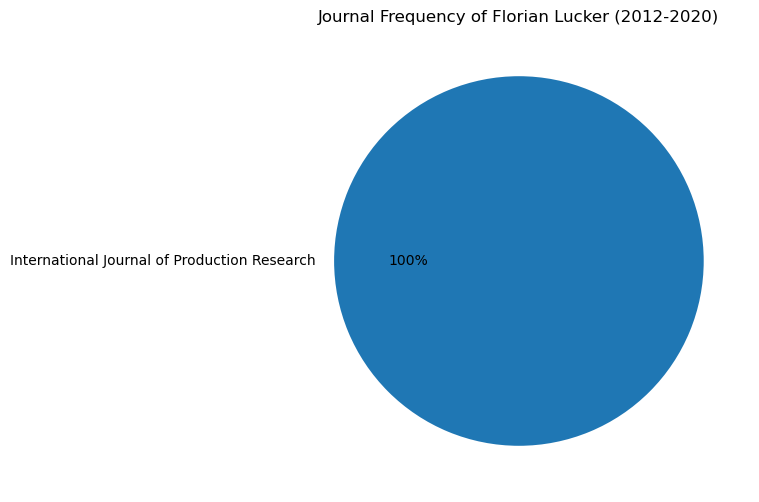

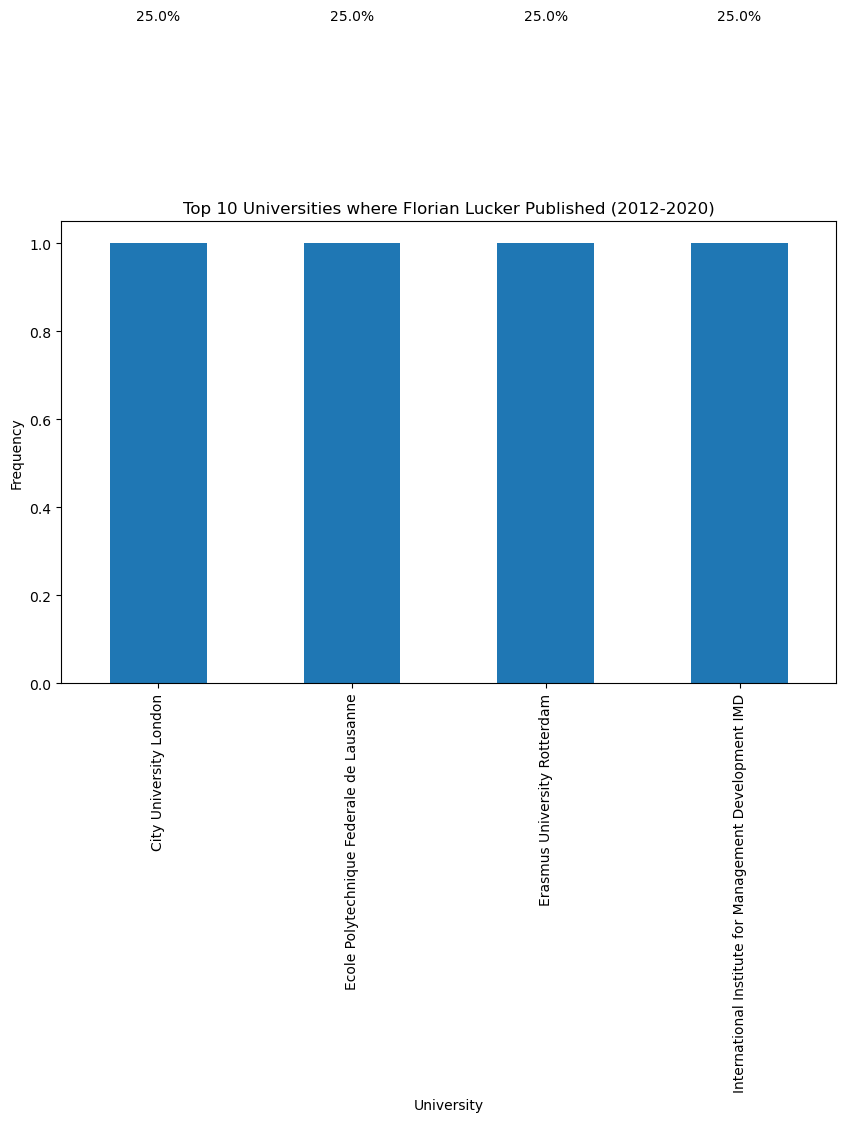

Florian Lucker published 1 papers between 2012 and 2020.
Titles of the papers:
- Roles of inventory and reserve capacity in mitigating supply chain disruption risk


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_author_journal_university_frequency(df, first_name, last_name, start_year, end_year):
    author_full_name = first_name + " " + last_name

    # Check if the author exists in the dataset
    author_columns = [f'Author{i}FullName' for i in range(1, 11)]
    author_exists = (df[author_columns] == author_full_name).any().any()

    if author_exists:
        # Filter the dataset for the specified author and year range
        author_mask = df[author_columns].apply(lambda x: author_full_name in x.values, axis=1)
        df_author = df[author_mask]
        df_author = df_author[(df_author['Year'] >= start_year) & (df_author['Year'] <= end_year)]
        
        if not df_author.empty:
            # List the names of the papers
            paper_titles = df_author['Title'].tolist()
            
            # Count the number of published papers
            num_papers = len(df_author)
            
            # Count the frequency of journals for the specified author
            journal_counts = df_author['Journal'].value_counts()
            
            # Extract university columns
            university_columns = [f'University{i}' for i in range(1, 11)]
            universities = df_author[university_columns].stack().reset_index(level=1, drop=True)
            university_counts = universities.value_counts().nlargest(10)  # Get top 10 universities
            total_universities = university_counts.sum()
            
            # Calculate percentages for universities
            university_percentages = (university_counts / total_universities) * 100

            # Plot pie chart for journal distribution
            plt.figure(figsize=(10, 6))
            journal_counts.plot(kind='pie', autopct="%.0f%%", title=f'Journal Frequency of {author_full_name} ({start_year}-{end_year})')
            plt.ylabel('')
            plt.show()

            # Plot bar chart for university distribution with percentages
            plt.figure(figsize=(10, 6))
            ax = university_counts.plot(kind='bar', title=f'Top 10 Universities where {author_full_name} Published ({start_year}-{end_year})')
            plt.xlabel('University')
            plt.ylabel('Frequency')
            
            # Adding percentage labels on top of the bars
            for i, (count, percentage) in enumerate(zip(university_counts, university_percentages)):
                ax.text(i, count + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

            plt.show()
            
            # Displaying the number of published papers and their titles
            print(f"{author_full_name} published {num_papers} papers between {start_year} and {end_year}.")
            print("Titles of the papers:")
            for title in paper_titles:
                print(f"- {title}")
        else:
            print(f"No publications found for {author_full_name} in the given year range.")
    else:
        print(f"The author {author_full_name} does not exist in the dataset.")

# Prompt the user for the year range
start_year = int(input("Enter the start year (2000 to 2022): "))
end_year = int(input("Enter the end year (2000 to 2022): "))

# Validate the year inputs
if start_year < 2000 or start_year > 2022 or end_year < 2000 or end_year > 2022 or start_year > end_year:
    print("Invalid year range. Please enter years between 2000 and 2022.")
else:
    # Prompt the user for the author's first and last name
    first_name = input("Enter the author's first name: ")
    last_name = input("Enter the author's last name: ")

    # Example usage with user input
    plot_author_journal_university_frequency(df_filtered, first_name, last_name, start_year, end_year)

In [8]:
import pandas as pd

def display_author_details(df, first_name, last_name, start_year, end_year):
    author_full_name = first_name + " " + last_name

    # Check if the author exists in the dataset
    author_columns = [f'Author{i}FullName' for i in range(1, 11)]
    author_exists = (df[author_columns] == author_full_name).any().any()

    if author_exists:
        # Filter the dataset for the specified author and year range
        author_mask = df[author_columns].apply(lambda x: author_full_name in x.values, axis=1)
        df_author = df[author_mask]
        df_author = df_author[(df_author['Year'] >= start_year) & (df_author['Year'] <= end_year)]
        
        if not df_author.empty:
            # Extract relevant details
            details = df_author[['Year', 'Title', 'Journal'] + [f'University{i}' for i in range(1, 11)]]

            # Melt the DataFrame to get a long format for universities
            details_melted = details.melt(id_vars=['Year', 'Title', 'Journal'], value_vars=[f'University{i}' for i in range(1, 11)], var_name='UniversityIndex', value_name='University')
            details_melted = details_melted.dropna(subset=['University'])
            
            # Drop the UniversityIndex column as it's not needed in the final display
            details_melted = details_melted.drop(columns=['UniversityIndex'])
            
            # Display the table
            details_melted_sorted = details_melted.sort_values(by=['Year', 'Title', 'Journal', 'University'])
            print(details_melted_sorted.to_string(index=False))

            return details_melted_sorted
        else:
            print(f"No publications found for {author_full_name} in the given year range.")
            return pd.DataFrame()
    else:
        print(f"The author {author_full_name} does not exist in the dataset.")
        return pd.DataFrame()

# Prompt the user for the year range
start_year = int(input("Enter the start year (2000 to 2022): "))
end_year = int(input("Enter the end year (2000 to 2022): "))

# Validate the year inputs
if start_year < 2000 or start_year > 2022 or end_year < 2000 or end_year > 2022 or start_year > end_year:
    print("Invalid year range. Please enter years between 2000 and 2022.")
else:
    # Prompt the user for the author's first and last name
    first_name = input("Enter the author's first name: ")
    last_name = input("Enter the author's last name: ")

    # Example usage with user input
    author_details = display_author_details(df_filtered, first_name, last_name, start_year, end_year)


Enter the start year (2000 to 2022): 2000
Enter the end year (2000 to 2022): 2022
Enter the author's first name: Florian
Enter the author's last name: Lucker
 Year                                                                                                        Title                                                       Journal                                             University
 2019                           Roles of inventory and reserve capacity in mitigating supply chain disruption risk                  International Journal of Production Research                                 City University London
 2019                           Roles of inventory and reserve capacity in mitigating supply chain disruption risk                  International Journal of Production Research               Ecole Polytechnique Federale de Lausanne
 2019                           Roles of inventory and reserve capacity in mitigating supply chain disruption risk                  International 

Enter the start year (2000 to 2022): 2000
Enter the end year (2000 to 2022): 2020
Enter the author's first name: Anil
Enter the author's last name: Arya
 Year                                                                                                              Title                                   Journal                                 University
 2011                  Supply Chains and Segment Profitability: How Input Pricing Creates a Latent Cross-Segment Subsidy                     The Accounting Review                  The Ohio State University
 2011                  Supply Chains and Segment Profitability: How Input Pricing Creates a Latent Cross-Segment Subsidy                     The Accounting Review                  The Ohio State University
 2011                                   The Benefits of Aggregate Performance Metrics in the Presence of Career Concerns                        Management Science                      Ohio State University
 2011                  

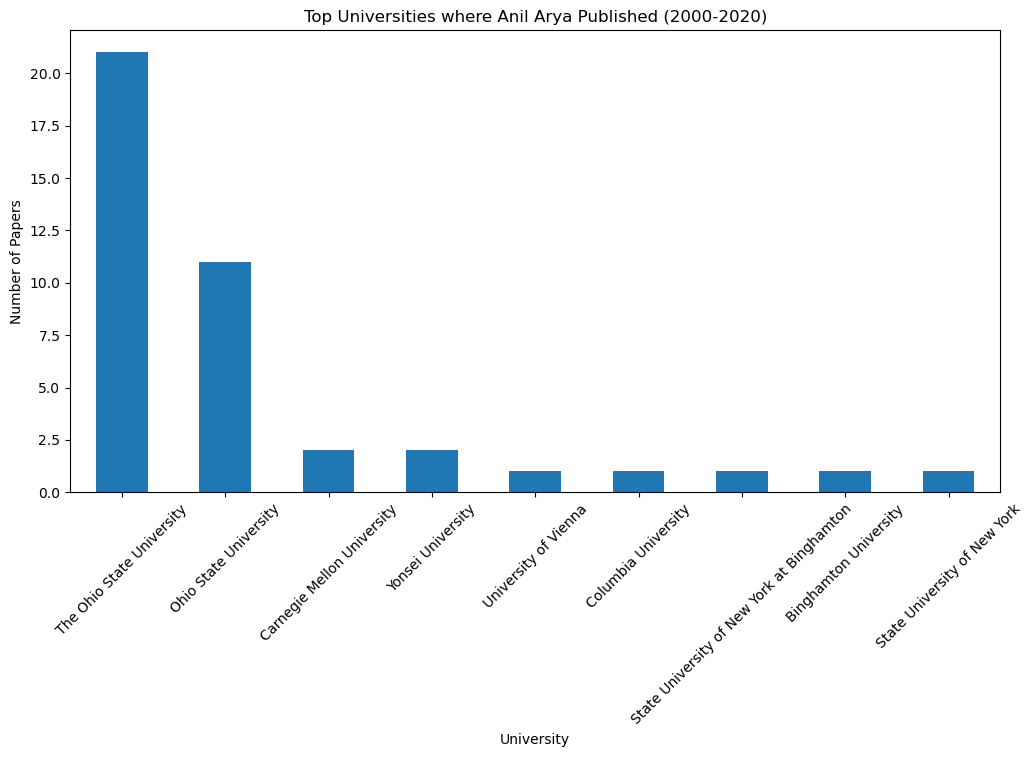

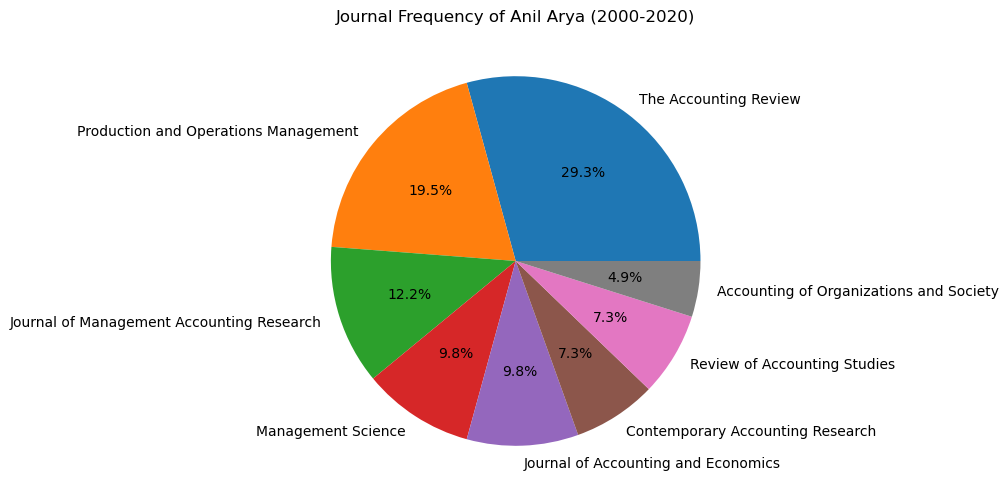

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def display_author_details_and_charts(df, first_name, last_name, start_year, end_year):
    author_full_name = first_name + " " + last_name

    # Check if the author exists in the dataset
    author_columns = [f'Author{i}FullName' for i in range(1, 11)]
    author_exists = (df[author_columns] == author_full_name).any().any()

    if author_exists:
        # Filter the dataset for the specified author and year range
        author_mask = df[author_columns].apply(lambda x: author_full_name in x.values, axis=1)
        df_author = df[author_mask]
        df_author = df_author[(df_author['Year'] >= start_year) & (df_author['Year'] <= end_year)]
        
        if not df_author.empty:
            # Extract relevant details
            details = df_author[['Year', 'Title', 'Journal'] + [f'University{i}' for i in range(1, 11)]]

            # Melt the DataFrame to get a long format for universities
            details_melted = details.melt(id_vars=['Year', 'Title', 'Journal'], value_vars=[f'University{i}' for i in range(1, 11)], var_name='UniversityIndex', value_name='University')
            details_melted = details_melted.dropna(subset=['University'])
            
            # Drop the UniversityIndex column as it's not needed in the final display
            details_melted = details_melted.drop(columns=['UniversityIndex'])
            
            # Display the table
            details_melted_sorted = details_melted.sort_values(by=['Year', 'Title', 'Journal', 'University'])
            print(details_melted_sorted.to_string(index=False))

            # Plot bar chart for university distribution
            university_counts = details_melted['University'].value_counts()
            plt.figure(figsize=(12, 6))
            university_counts.plot(kind='bar', title=f'Top Universities where {author_full_name} Published ({start_year}-{end_year})')
            plt.xlabel('University')
            plt.ylabel('Number of Papers')
            plt.xticks(rotation=45)
            plt.show()

            # Plot pie chart for journal distribution
            journal_counts = details_melted['Journal'].value_counts()
            plt.figure(figsize=(12, 6))
            journal_counts.plot(kind='pie', autopct="%.1f%%", title=f'Journal Frequency of {author_full_name} ({start_year}-{end_year})')
            plt.ylabel('')
            plt.show()

            return details_melted_sorted
        else:
            print(f"No publications found for {author_full_name} in the given year range.")
            return pd.DataFrame()
    else:
        print(f"The author {author_full_name} does not exist in the dataset.")
        return pd.DataFrame()

# Prompt the user for the year range
start_year = int(input("Enter the start year (2000 to 2022): "))
end_year = int(input("Enter the end year (2000 to 2022): "))

# Validate the year inputs
if start_year < 2000 or start_year > 2022 or end_year < 2000 or end_year > 2022 or start_year > end_year:
    print("Invalid year range. Please enter years between 2000 and 2022.")
else:
    # Prompt the user for the author's first and last name
    first_name = input("Enter the author's first name: ")
    last_name = input("Enter the author's last name: ")

    # Example usage with user input
    author_details = display_author_details_and_charts(df_filtered, first_name, last_name, start_year, end_year)